<a href="https://colab.research.google.com/github/EricSiq/Statistical-Analysis-of-India-s-Groundwater-/blob/main/STAIML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary libraries
!pip install pandas matplotlib seaborn

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSV files from Google Drive
csv_2017 = pd.read_csv('/content/drive/MyDrive/STAIML MiniProj/2017GW.csv')
csv_2020 = pd.read_csv('/content/drive/MyDrive/STAIML MiniProj/2020GW.csv')
csv_2022 = pd.read_csv('/content/drive/MyDrive/STAIML MiniProj/2022GW.csv')

# Combine the data into a single DataFrame
data = pd.concat([csv_2017, csv_2020, csv_2022], ignore_index=True)

# Add a 'Year' column
data['Year'] = pd.Series([2017] * len(csv_2017) + [2020] * len(csv_2020) + [2022] * len(csv_2022))

ValueError: mount failed

In [ ]:
# Checking of each of three datasets
print("Shape of csv_2017:", csv_2017.shape)
print("Shape of csv_2020:", csv_2020.shape)
print("Shape of csv_2022:", csv_2022.shape)

Shape of csv_2017: (689, 16)
Shape of csv_2020: (683, 16)
Shape of csv_2022: (706, 16)


In [ ]:
# Check missing values for 2017 dataset
missing_values_2017 = csv_2017.isna().sum()
print("Missing values in 2017 dataset:")
print(missing_values_2017)

# Check missing values for 2020 dataset
missing_values_2020 = csv_2020.isna().sum()
print("\nMissing values in 2020 dataset:")
print(missing_values_2020)

# Check missing values for 2022 dataset
missing_values_2022 = csv_2022.isna().sum()
print("\nMissing values in 2022 dataset:")
print(missing_values_2022)


Missing values in 2017 dataset:
S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            5
Recharge from other sources During Monsoon Season                       5
Recharge from rainfall During Non Monsoon Season                        5
Recharge from other sources During Non Monsoon Season                   5
Total Annual Ground Water Recharge                                      5
Total Natural Discharges                                                5
Annual Extractable Ground Water Resource                                5
Current Annual Ground Water Extraction For Irrigation                   5
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            5
Annual

In [ ]:

def calculate_groundwater_statistics(df):
    state_list = []
    total_grnd_water_recharge = []
    curr_gw_extr_list = []
    future_available_GW_list = []

    for state, subset in df.groupby('Name of State'):
        state_list.append(state)
        total_grnd_water_recharge.append(sum(subset['Total Annual Ground Water Recharge']))
        curr_gw_extr_list.append(sum(subset['Total Current Annual Ground Water Extraction']))
        future_available_GW_list.append(sum(subset['Net Ground Water Availability for future use']))

    return pd.DataFrame({"State":state_list, "GW_Recharge":total_grnd_water_recharge, "GW_Extraction": curr_gw_extr_list, "Future_GW_Available": future_available_GW_list})

# Apply the function to each dataset
df_2017_stats = calculate_groundwater_statistics(csv_2017)
df_2020_stats = calculate_groundwater_statistics(csv_2020)
df_2022_stats = calculate_groundwater_statistics(csv_2022)

# Print the statistics for 2017 dataset
print("Statistics for 2017 dataset:")
print(df_2017_stats)

# Print the statistics for 2020 dataset
print("\nStatistics for 2020 dataset:")
print(df_2020_stats)

# Print the statistics for 2022 dataset
print("\nStatistics for 2022 dataset:")
print(df_2022_stats)


Statistics for 2017 dataset:
                   State  GW_Recharge  GW_Extraction  Future_GW_Available
0             A&N ISLAND     36841.83         908.17             32131.52
1         ANDHRA PRADESH   2121785.20      889703.22           1231396.30
2      ARUNACHAL PRADESH          NaN            NaN                  NaN
3                  ASSAM   2867207.67      272808.75           2142976.56
4                  BIHAR   3141397.82     1326418.38           1578245.42
5             CHANDIGARH      4216.00        3378.00               416.00
6            CHATTISGARH   1157241.10      469527.41            576373.37
7                  DELHI     32100.02       35990.29              2299.43
8   Dadra & Nagar Haveli      6861.59        2042.86              4475.73
9                  Daman      1304.00         635.00               480.00
10                   Diu       471.00         386.00                 6.00
11                   GOA     26722.34        5371.36              6992.81
12       

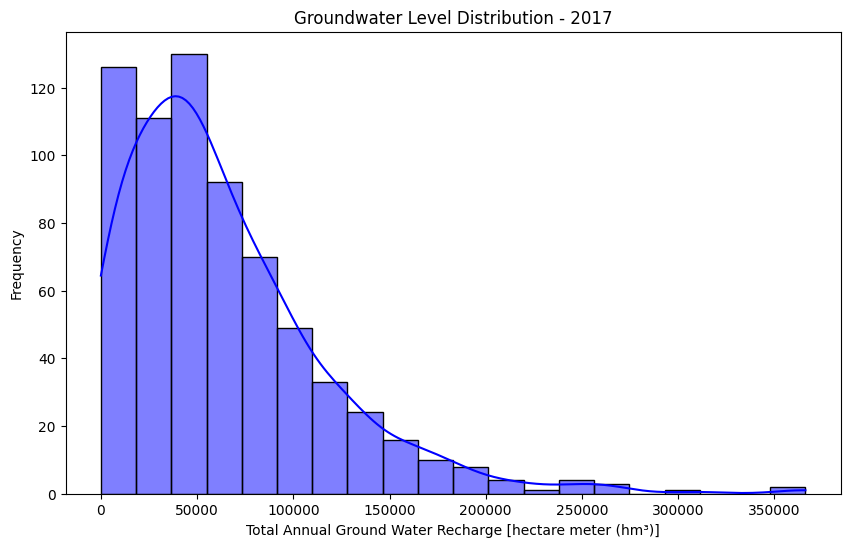

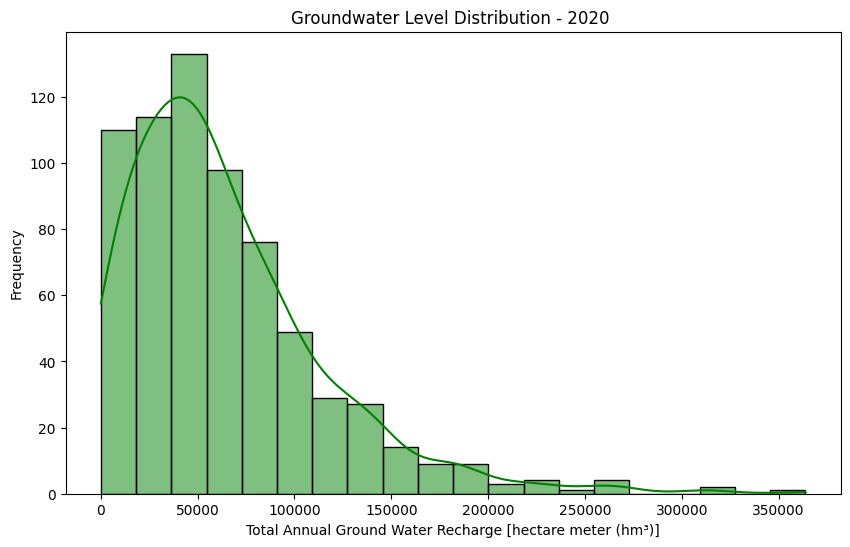

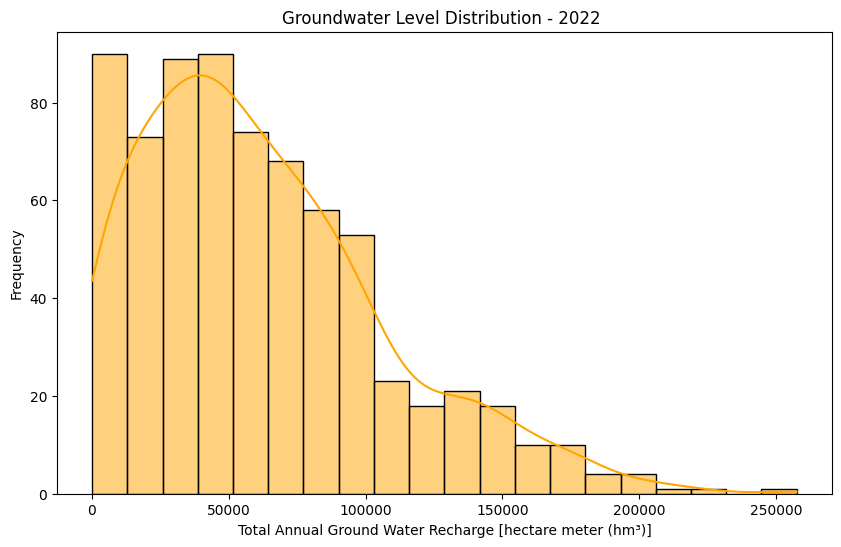

In [ ]:
# Visualizing groundwater dsitribution for 2017
plt.figure(figsize=(10, 6))
sns.histplot(data=csv_2017, x='Total Annual Ground Water Recharge', bins=20, kde=True, color='blue')
plt.title('Groundwater Level Distribution - 2017')
plt.xlabel('Total Annual Ground Water Recharge [hectare meter (hm³)]')
plt.ylabel('Frequency')
plt.show()

# Visualizing groundwater dsitribution for 2020
plt.figure(figsize=(10, 6))
sns.histplot(data=csv_2020, x='Total Annual Ground Water Recharge', bins=20, kde=True, color='green')
plt.title('Groundwater Level Distribution - 2020 ')
plt.xlabel('Total Annual Ground Water Recharge [hectare meter (hm³)]')
plt.ylabel('Frequency')
plt.show()

# Visualizing groundwater dsitribution for 2022
plt.figure(figsize=(10, 6))
sns.histplot(data=csv_2022, x='Total Annual Ground Water Recharge', bins=20, kde=True, color='orange')
plt.title('Groundwater Level Distribution - 2022 ')
plt.xlabel('Total Annual Ground Water Recharge [hectare meter (hm³)]')
plt.ylabel('Frequency')
plt.show()


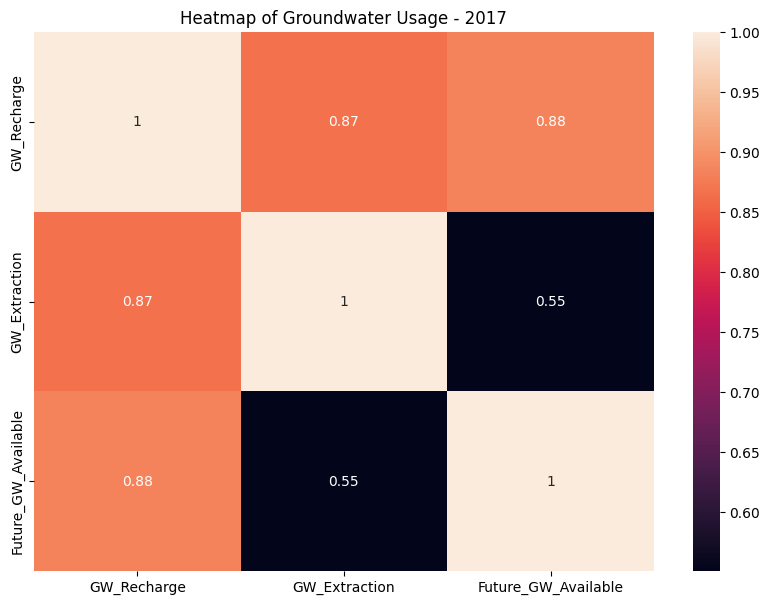

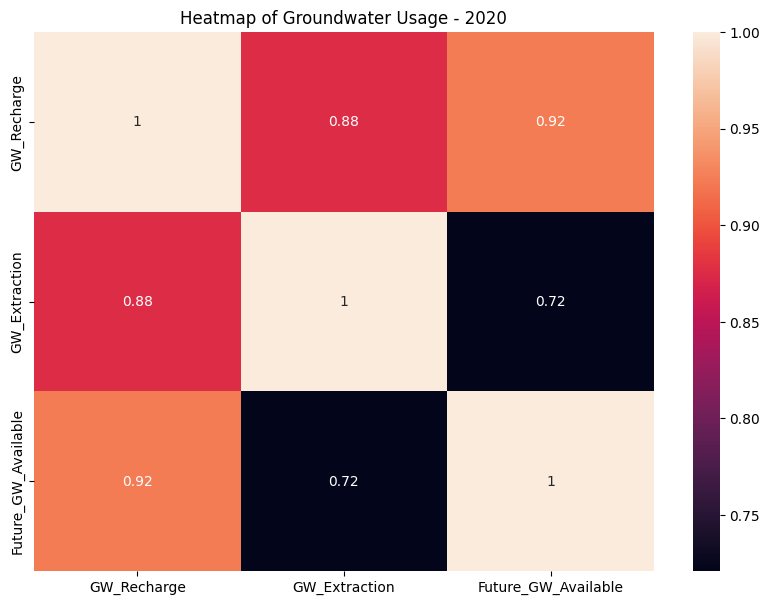

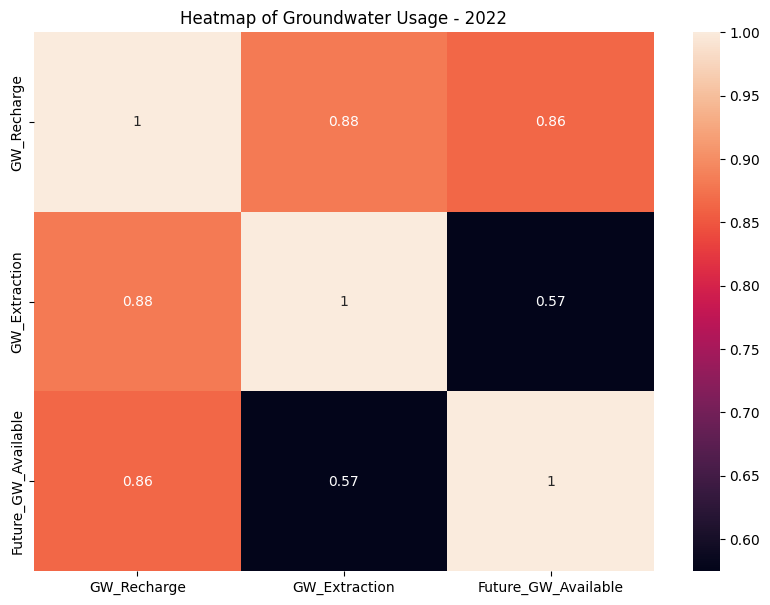

In [ ]:
# Define function to plot heatmap for each year
def plot_heatmap_for_year(df, year):
    # Check if columns exist before dropping them
    columns_to_drop = ['S.no.', 'Name of State', 'Name of District', 'State']
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]  # Filter existing columns

    if columns_to_drop:
        # Drop specified columns
        df = df.drop(columns_to_drop, axis=1)

    # Convert non-numeric values to numeric
    numeric_df = df.apply(pd.to_numeric, errors='coerce')

    # Plot heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(numeric_df.corr(), annot=True)
    plt.title(f'Heatmap of Groundwater Usage - {year}')
    plt.show()

# Plot heatmap for each year
plot_heatmap_for_year(df_2017_stats, 2017)
plot_heatmap_for_year(df_2020_stats, 2020)
plot_heatmap_for_year(df_2022_stats, 2022)


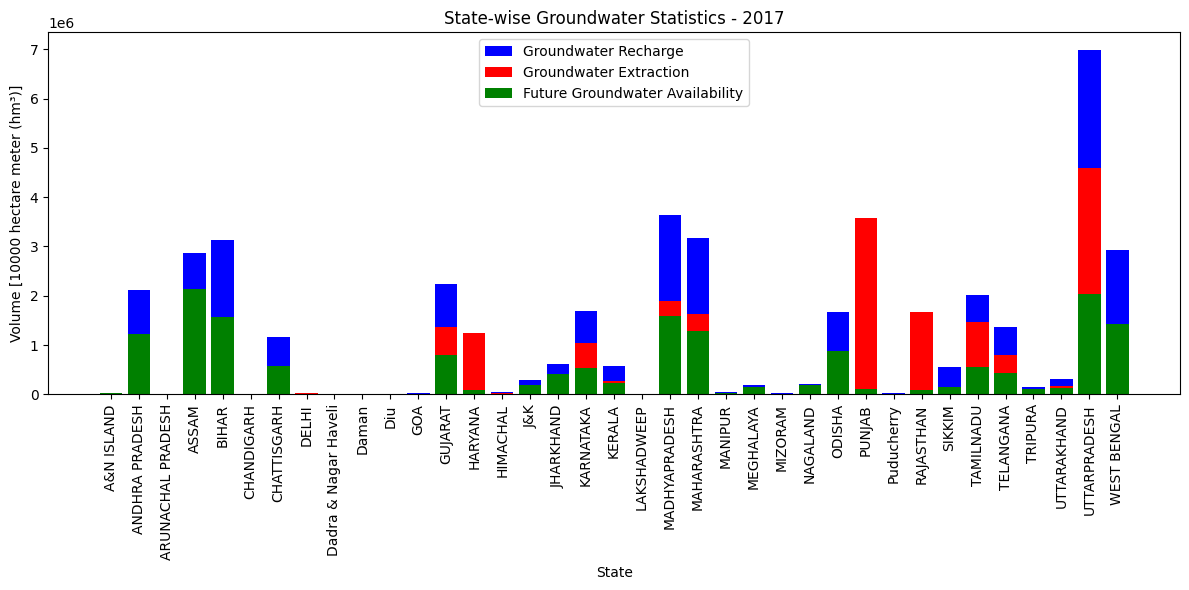

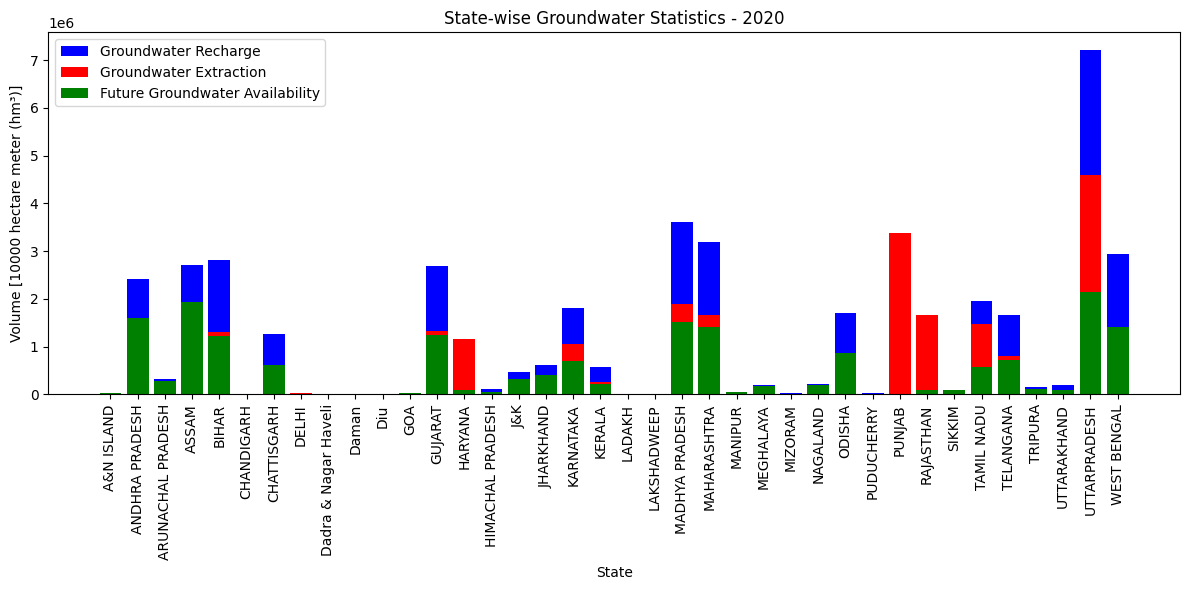

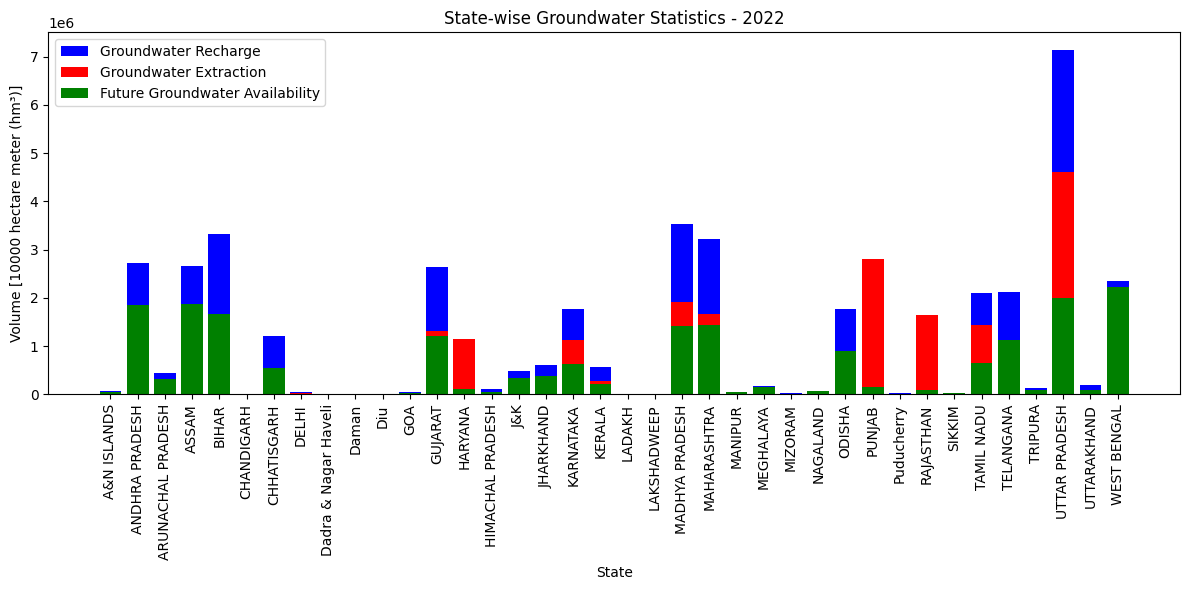

In [ ]:

# Defining function to plot state-wise statistics to compare recharge rate v/s extraction v/s availability
def plot_statewise_statistics(df, year):
    plt.figure(figsize=(12, 6))
    plt.bar(df['State'], df['GW_Recharge'], color='blue', label='Groundwater Recharge')
    plt.bar(df['State'], df['GW_Extraction'], color='red', label='Groundwater Extraction')
    plt.bar(df['State'], df['Future_GW_Available'], color='green', label='Future Groundwater Availability')
    plt.xlabel('State')
    plt.ylabel('Volume [10000 hectare meter (hm³)]')
    plt.title(f'State-wise Groundwater Statistics - {year}')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot state-wise statistics for 2017 dataset
plot_statewise_statistics(df_2017_stats, '2017')

# Plot state-wise statistics for 2020 dataset
plot_statewise_statistics(df_2020_stats, '2020')

# Plot state-wise statistics for 2022 dataset
plot_statewise_statistics(df_2022_stats, '2022')


Mean Extraction-Recharge ratio for 2017: 0.5799154940134049  or,  57.99  percent.
Mean Extraction-Recharge ratio for 2020: 0.5615603386485803  or,  56.16  percent.
Mean Extraction-Recharge ratio for 2022: 0.546594095073245  or,  54.66  percent.


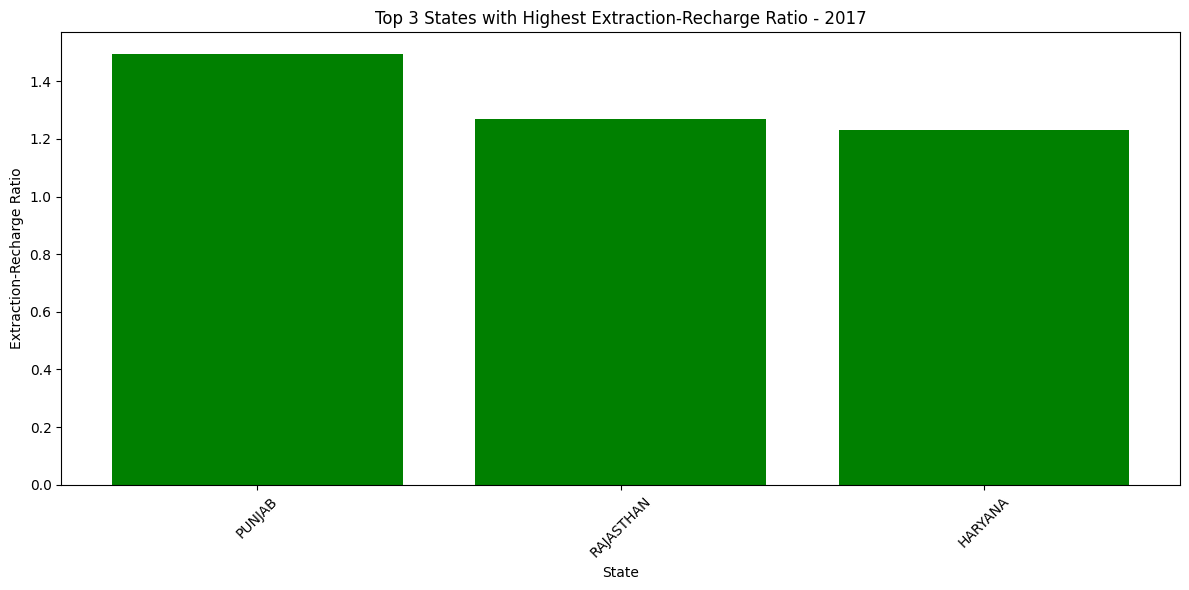

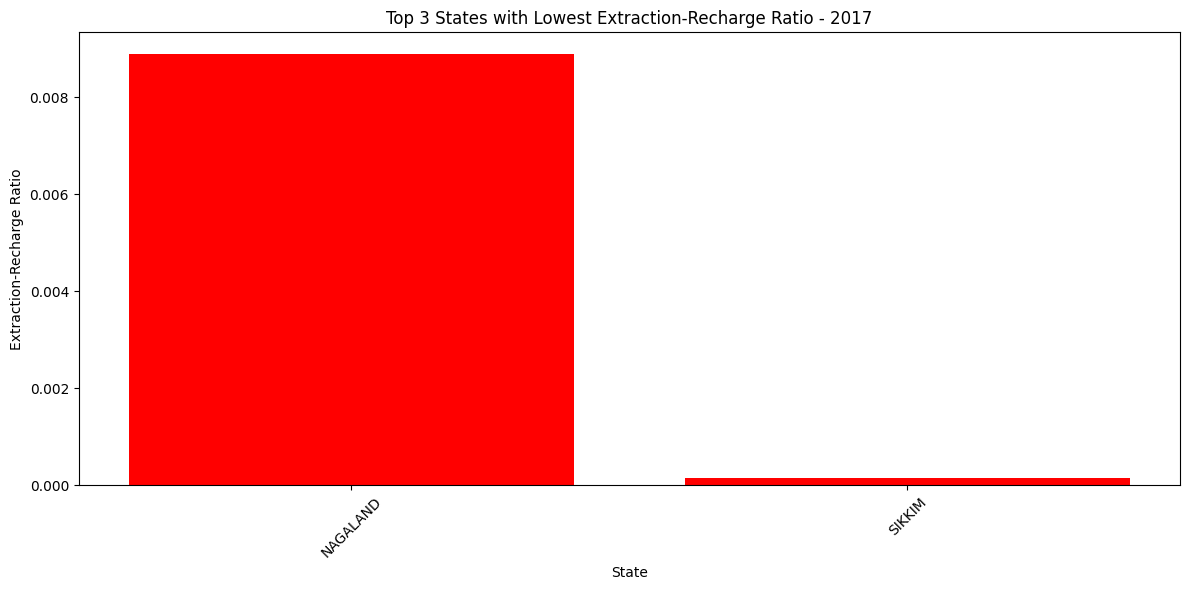

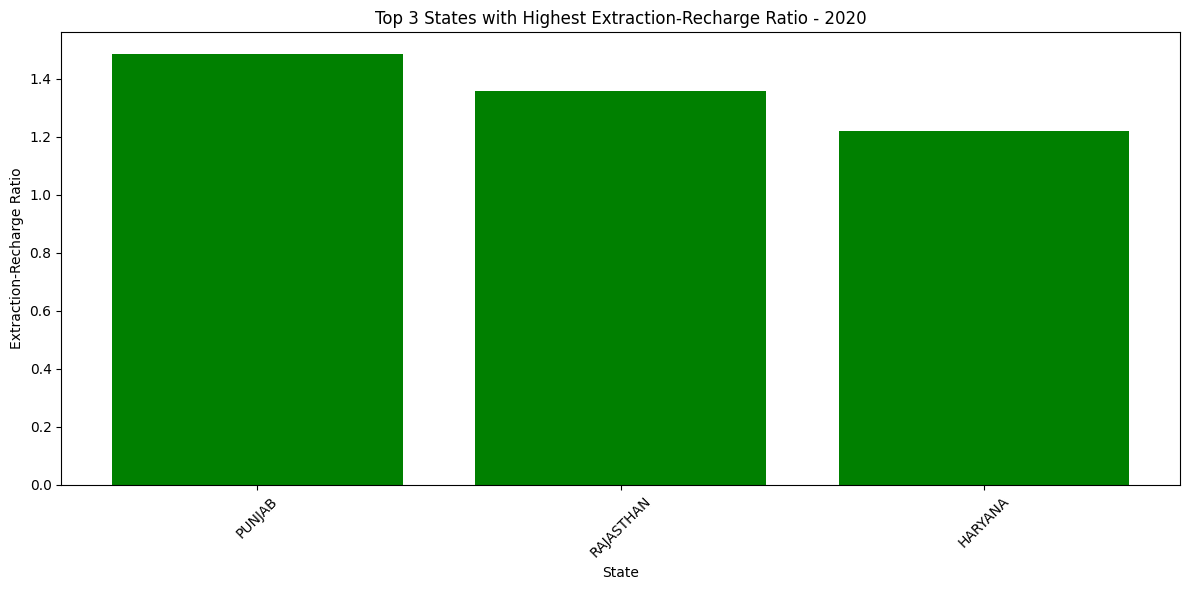

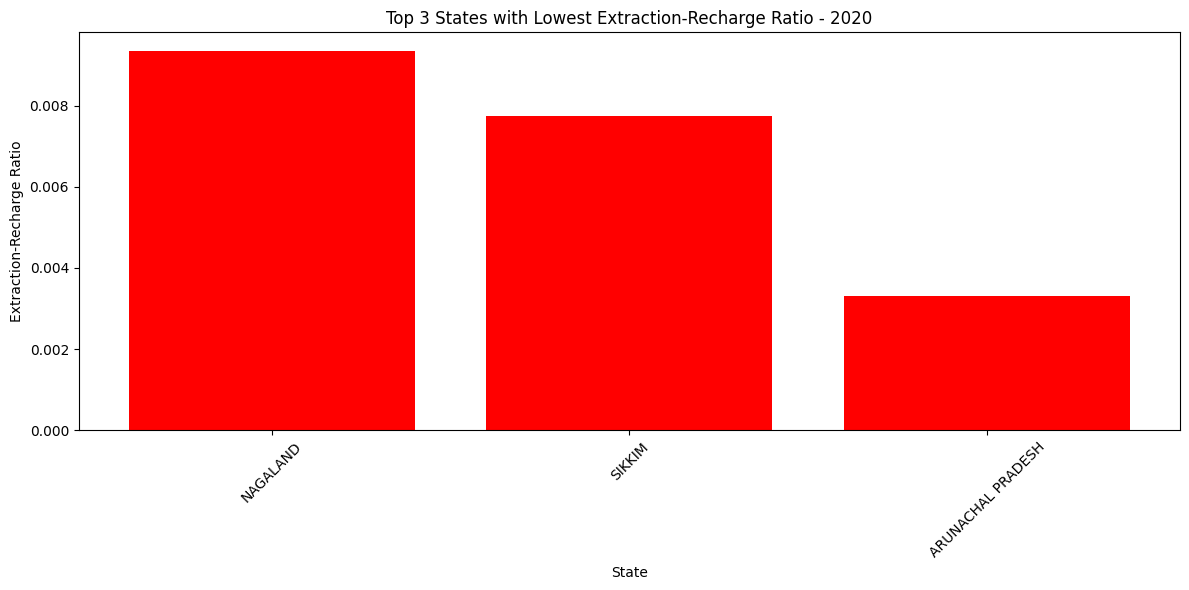

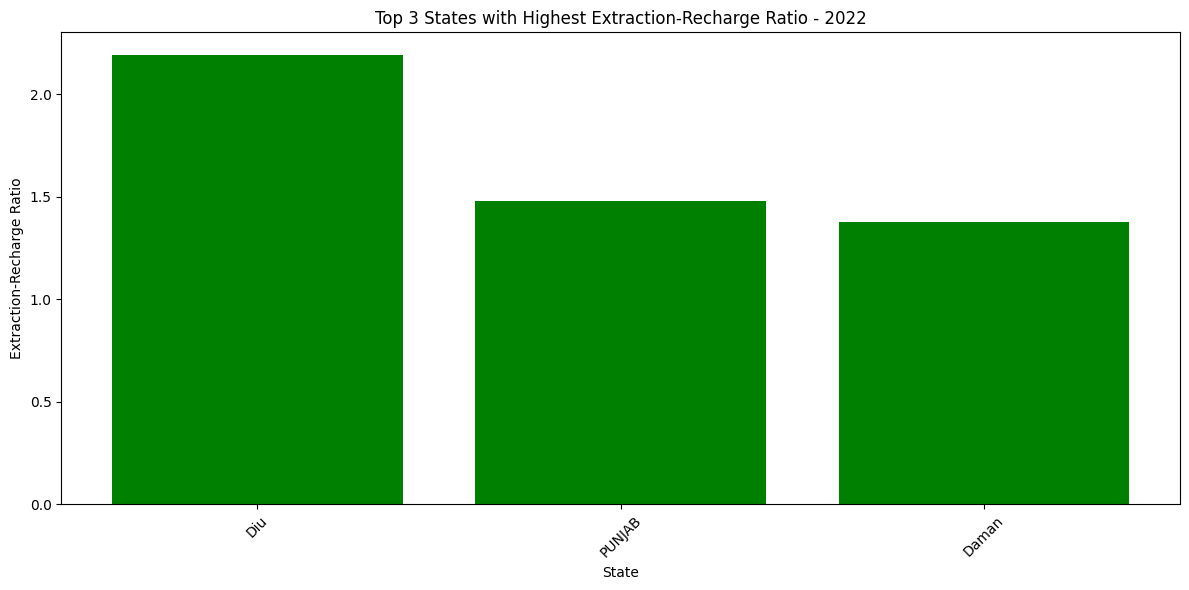

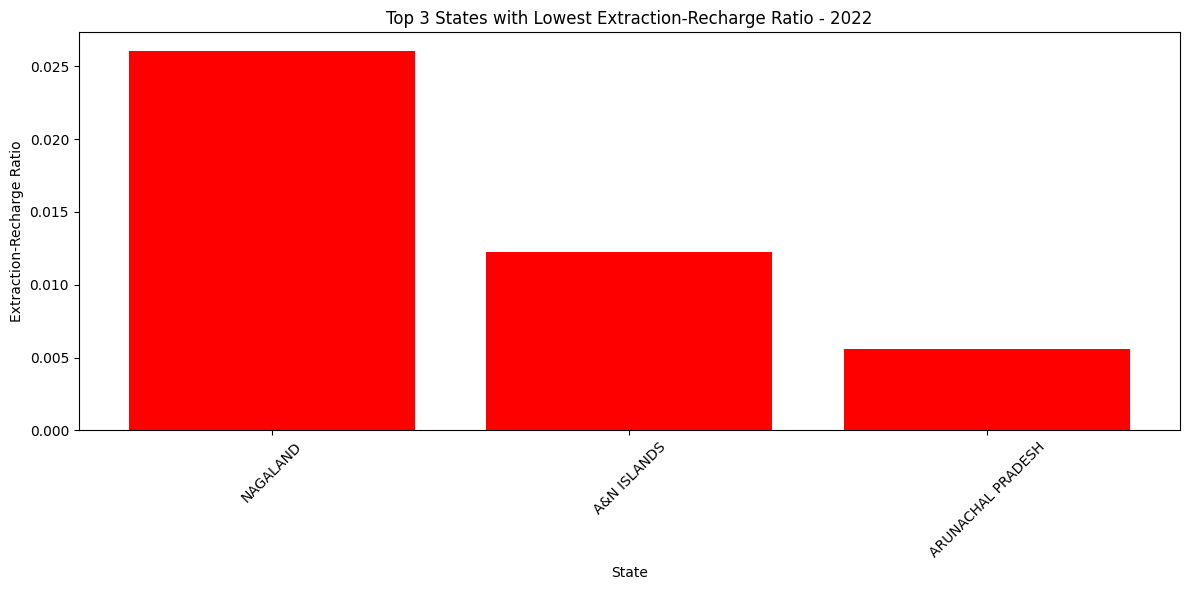

In [ ]:
# Calculate the mean ratio for each year
mean_ratio_2017 = df_2017_stats['GW_Extraction'].sum() / df_2017_stats['GW_Recharge'].sum()
mean_ratio_2020 = df_2020_stats['GW_Extraction'].sum() / df_2020_stats['GW_Recharge'].sum()
mean_ratio_2022 = df_2022_stats['GW_Extraction'].sum() / df_2022_stats['GW_Recharge'].sum()

# Print the mean ratios for each year
print("Mean Extraction-Recharge ratio for 2017:", mean_ratio_2017, " or, ",round(mean_ratio_2017*100,2), " percent.")
print("Mean Extraction-Recharge ratio for 2020:", mean_ratio_2020, " or, ",round(mean_ratio_2020*100,2), " percent.")
print("Mean Extraction-Recharge ratio for 2022:", mean_ratio_2022, " or, ",round(mean_ratio_2022*100,2), " percent.")

# Function to calculate extraction-recharge ratio and plot top and bottom states
def calculate_ratio_and_plot(df, year):
    # Sort DataFrame by extraction-recharge ratio
    sorted_df = df.sort_values(by=f'Extraction_Recharge_Ratio_{year}', ascending=False)

    # Get top and bottom 3 states
    top_states = sorted_df.head(3)
    bottom_states = sorted_df.tail(3)

    # Plot top 3 states with highest extraction-recharge ratio
    plt.figure(figsize=(12, 6))
    plt.bar(top_states['State'], top_states[f'Extraction_Recharge_Ratio_{year}'], color='green')
    plt.title(f'Top 3 States with Highest Extraction-Recharge Ratio - {year}')
    plt.xlabel('State')
    plt.ylabel('Extraction-Recharge Ratio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot bottom 3 states with lowest extraction-recharge ratio
    plt.figure(figsize=(12, 6))
    plt.bar(bottom_states['State'], bottom_states[f'Extraction_Recharge_Ratio_{year}'], color='red')
    plt.title(f'Top 3 States with Lowest Extraction-Recharge Ratio - {year}')
    plt.xlabel('State')
    plt.ylabel('Extraction-Recharge Ratio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calculate ratio and plot top and bottom states for each year
calculate_ratio_and_plot(df_2017_stats, '2017')
calculate_ratio_and_plot(df_2020_stats, '2020')
calculate_ratio_and_plot(df_2022_stats, '2022')

<ipython-input-34-1a44597efc11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df.sort_values(by='Total Annual Ground Water Recharge', ascending=False, inplace=True)


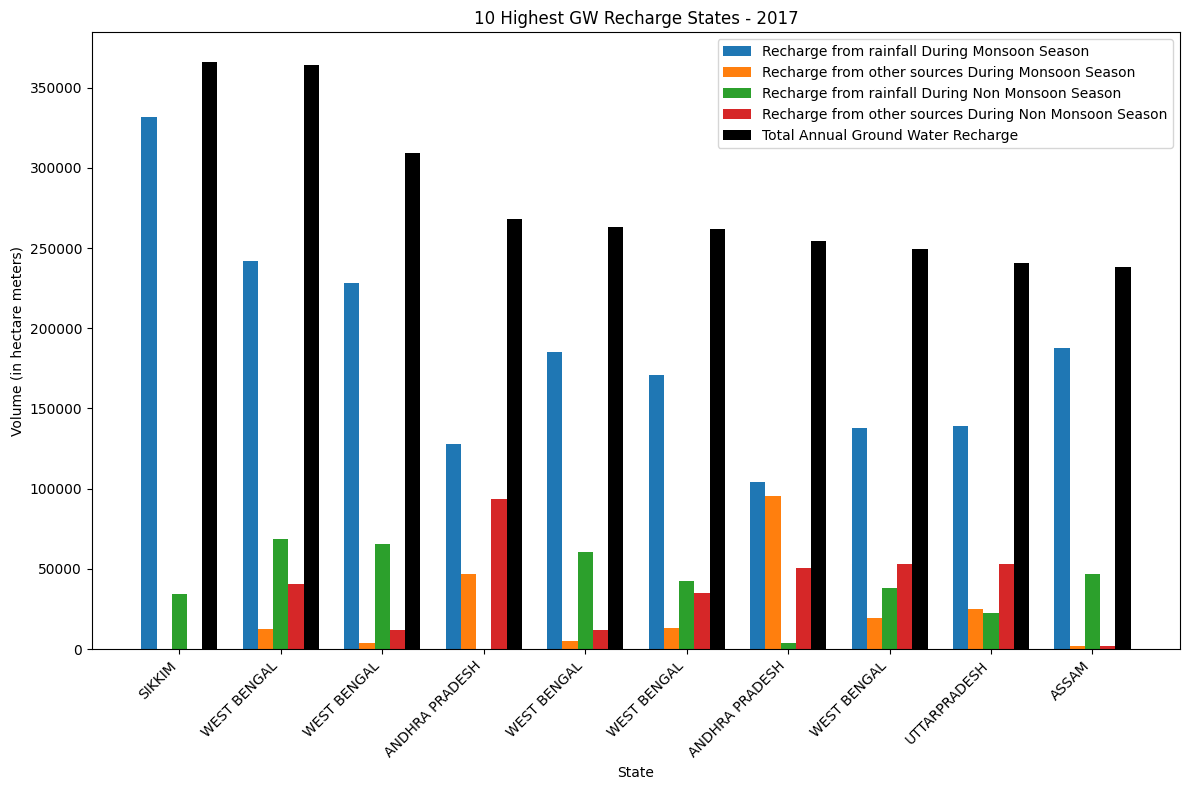

<ipython-input-34-1a44597efc11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df.sort_values(by='Total Annual Ground Water Recharge', ascending=False, inplace=True)


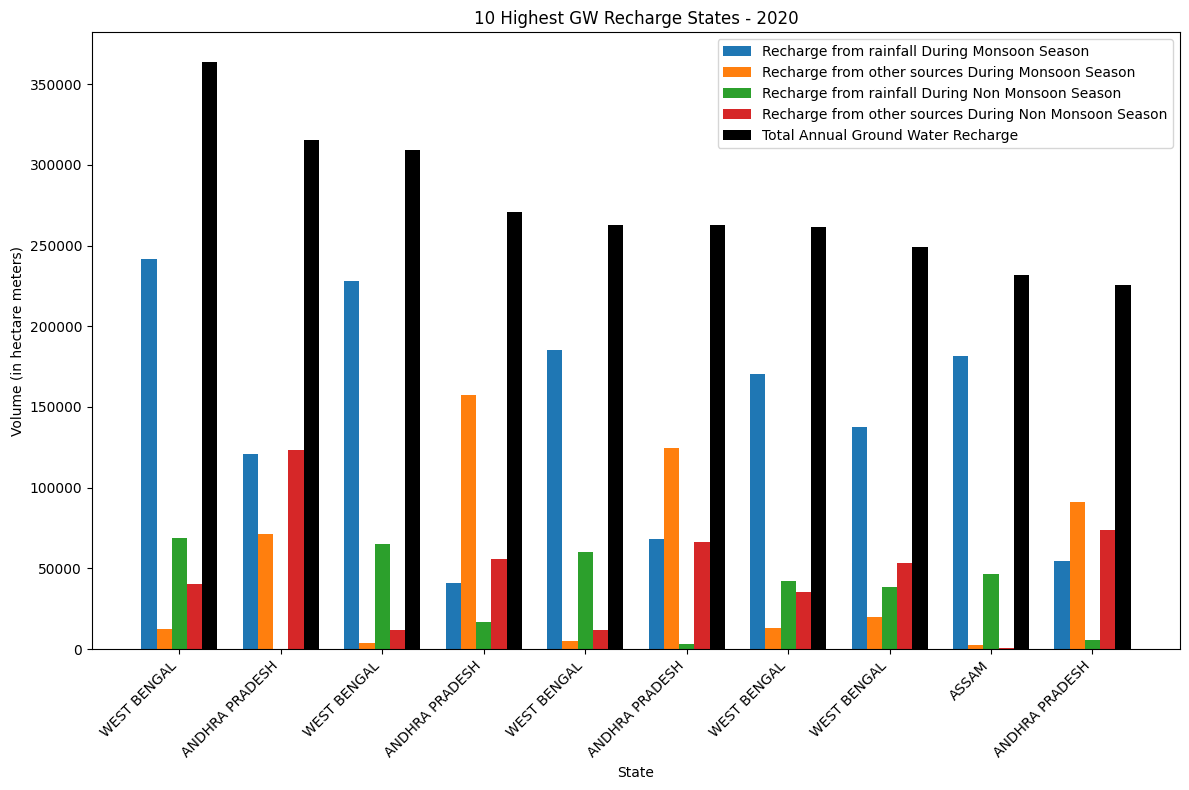

<ipython-input-34-1a44597efc11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df.sort_values(by='Total Annual Ground Water Recharge', ascending=False, inplace=True)


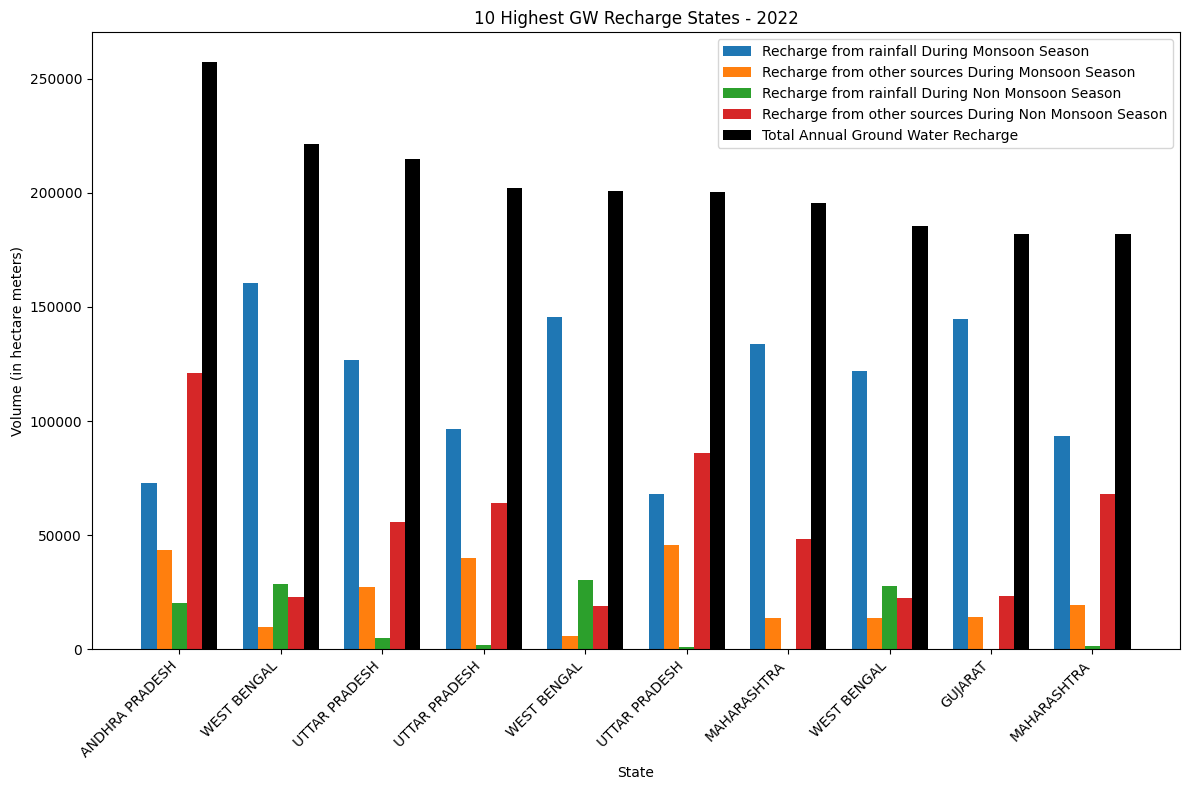

In [ ]:
def visualize_top_10_recharge_comparison(df, year):
    # Select relevant columns for comparison
    comparison_df = df[['Name of State',
                        'Recharge from rainfall During Monsoon Season',
                        'Recharge from other sources During Monsoon Season',
                        'Recharge from rainfall During Non Monsoon Season',
                        'Recharge from other sources During Non Monsoon Season',
                        'Total Annual Ground Water Recharge']]

    # Sort DataFrame by total annual groundwater recharge
    comparison_df.sort_values(by='Total Annual Ground Water Recharge', ascending=False, inplace=True)

    # Set 'Name of State' column as index
    comparison_df.set_index('Name of State', inplace=True)

    # Selecting and plotting top 10 states
    top_10_df = comparison_df.head(10)

    plt.figure(figsize=(12, 8))
    width = 0.15
    x = np.arange(len(top_10_df.index))

    # Bar plots for each source of recharge
    for i, column in enumerate(top_10_df.columns[:-1]): # Exclude 'Total Annual Ground Water Recharge'
        plt.bar(x + i*width, top_10_df[column], width=width, label=column)

    # Bar plot for total annual groundwater recharge
    plt.bar(x + 4*width, top_10_df['Total Annual Ground Water Recharge'], width=width, color='black', label='Total Annual Ground Water Recharge')

    plt.title(f'10 Highest GW Recharge States - {year}')
    plt.xlabel('State')
    plt.ylabel('Volume (in hectare meters)')
    plt.xticks(x + 2*width, top_10_df.index, rotation=45, ha='right')  # Adjust rotation angle
    plt.legend()
    plt.tight_layout()
    plt.show()

# Visualize top 10 recharge comparison for each dataset
visualize_top_10_recharge_comparison(csv_2017, '2017')
visualize_top_10_recharge_comparison(csv_2020, '2020')
visualize_top_10_recharge_comparison(csv_2022, '2022')